# PS.7

Consider a sequence $(x_k)_{k\in\mathbb{N}}$ in a Banach space $B$ such that $x_k\rightarrow x\in B$. We suppose that there are $c>0$ and $r>1$ such that 
$$
\|x_{k+1}-x\|\leq c \|x_k-x\|^r, \qquad\forall k\in\mathbb{N}. 
$$

Verify that 
$$
\|x_k-x\| \leq   c^{\frac{r^k-1}{r-1}}\|x_0-x\|^{r^k},\qquad k=1,2,3,\ldots
$$


## Solution

Proof by induction. For $k= 1$, we obtain

\begin{align*}
\|x_1-x\| & \leq c \|x_0-x\|^r =   c^{\frac{r-1}{r-1}}\|x_0-x\|^r.
\end{align*}

For the induction step ($k\mapsto k+1$), we compute 

\begin{align*}
\|x_{k+1}-x\| & \leq c \|x_k-x\|^r\\
& = c \left(c^{\frac{r^{k-1}-1}{r-1}}\|x_0-x\|^{r^{k-1}}\right)^r\\
& = c c^{\frac{r^{k}-r}{r-1}}\|x_0-x\|^{r^{k}}\\
& = c^{\frac{r-1}{r-1}} c^{\frac{r^{k}-r}{r-1}}\|x_0-x\|^{r^{k}}\\
& = c^{\frac{r^{k}-1}{r-1}}\|x_0-x\|^{r^{k}}\\
\end{align*}


# PS.7 (Horner's scheme)

Given $ x_0\in\mathbb{R}$ and a polynomial 

\begin{equation*}
p(x) = a_0+a_1x+a_2x^2+\cdots a_n x^n,
\end{equation*}

let us define $b_n = a_n$ and 

\begin{equation*}
b_{k-1} = a_{k-1}+b_k x_0,\qquad k=n,\ldots,1.
\end{equation*}

Then the choice 

\begin{equation*}
q(x)=b_1+b_2x+\cdots b_n x^{n-1}
\end{equation*}

leads to 

\begin{equation*}
p(x) = (x-x_0) q(x)+b_0,\qquad p(x_0)=b_0,\qquad p'(x_0) = q(x_0).
\end{equation*}

To evaluate $q$ at $x_0$, we also use a recursive scheme $c_{n} = b_n$ and 

\begin{equation*}
c_{k-1} = b_{k-1}+c_kx_0,\qquad k=n,\ldots,2,
\end{equation*}

so that $q(x_0) = c_1$.

a) Implement Horner's scheme, so that you return $p(x_0)$, $p'(x_0)$, and the coefficients of $q$.

In [1]:
function myHorner(a::Vector,x₀)
    n = length(a)
    b = copy(a)
    for k = n:-1:2 
        b[k-1] = a[k-1]+b[k]*x₀ 
    end
    c = b[n]
    for k = n:-1:3 
        c = b[k-1]+c*x₀     # Horner's scheme for q(x₀)
    end
    return b[1], c, b[2:end]
end

myHorner (generic function with 1 method)

b) Write a function myNewton for polynomials that uses Horner's scheme for evaluation of the polynomial and its derivative.

In [5]:
function myNewton(a::Vector, x0; tol=1e-16, maxiter=200)
    x = copy(x0)
    for _ in 1:maxiter
        f,∂f,b = myHorner(a,x)
        if abs(f)<tol return x end
        x -= f/∂f
    end
    return x
end

myNewton (generic function with 1 method)

In [6]:
using Test
using Polynomials:Polynomial    # makes the function Polynomial from the package Polynomials visible. "using Polynomials" would simply make all functions in Polynomials visible...
@testset "myRoots" begin     
    for k in 2:5
        a = [-k,0,1.] 
        p = Polynomial(a)
        x̂ = myNewton(a, k)
        @test abs(p(x̂)) < 1e-5
    end
end

Test Summary: | Pass  Total  Time
myRoots       |    4      4  0.0s


Test.DefaultTestSet("myRoots", Any[], 4, false, false, true, 1.67000703963257e9, 1.670007039632684e9)

# PS.7 (Find all zeros of a polynomial)
Given a polynomial $p$, Newton's method provides an approximation $x_0$ with $p(x_0)\approx 0$. Horner's scheme yields

\begin{equation*}
p(x) = (x-x_0)q(x)+p(x_0) \approx (x-x_0)q(x).
\end{equation*}

Thus, we may use $q$ to compute the remaining zeros of $p$. We apply Newton's method to $q$ (with initial value $x_0$) and obtain $y$ with $q(y)\approx 0$. To increase accuracy, $y$ is used as initialization for Newton's method applied to $p$:

0) Pick some initial value $x_{start}$ and apply Newton's method to $p$. We obtain the first root $x_0$ of $p$, i.e., 

\begin{equation*}
Newton(p,x_{start}) \rightarrow x_0
\end{equation*}

1) Apply Horner's scheme to remove the linear factor $(x-x_0)$ from $q_0:=p$. Then apply Newton's method to $q_1$ to obtain $y_1$. To increase accuracy, $y_1$ is used as initial value for Newton's method with the original $p$. This leads to the second root $x_1$ of $p$.

\begin{align*}
&Horner(p,x_0)  \rightarrow q_1 , \quad \text{ such that }\quad p(x) = (x-x_0)q_1(x)\\
&Newton(q_1,x_0) \rightarrow y_1\\
&Newton(p,y_1) \rightarrow x_1
\end{align*}

2) Repeat the above step as follows:

\begin{align*}
&Horner(q_1,x_1) \rightarrow q_2 , \quad \text{ such that }\quad q_1(x) = (x-x_1)q_2(x)\\
&Newton(q_2,x_1) \rightarrow y_2\\
&Newton(p,y_2) \rightarrow x_2
\end{align*}

3) Repeat...

This process is repeated until all roots $x_0,x_1,x_2,\ldots$ are found. 



a) Write a function findAllRoots that computes all roots of a polynomial via Newton's method and Horner's scheme. The input is supposed to be the coefficient vector $a$ of the polynomial and some initial value $x_0$. 

b) Apply your implementation to the polynomial $p(x)=(x-1)(x-5)^2(x-7)(x-9)$. 

In [7]:
function findAllRoots(a,x0)
    n = length(a)-1
    x = []
    b = copy(a)
    push!(x,myNewton(b,x0))
    for k = 1:n-1
        b₀,c,b = myHorner(b,x[k])
        y = myNewton(b,x[k])
        push!(x,myNewton(a,y))
    end
    return x
end

findAllRoots (generic function with 1 method)

In [8]:
using Polynomials:fromroots,coeffs    # two more functions are used from Polynomials
X = [1.,5,5,7,9]
P = fromroots(X)
a = coeffs(P)

z = findAllRoots(a,1)

5-element Vector{Any}:
 1
 4.99999985494647
 4.999999863763826
 6.999999999999974
 9.000000000000012

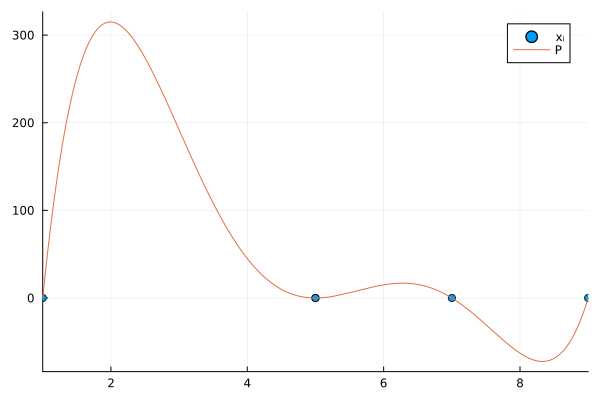

In [10]:
using Plots:scatter,plot!   
scatter(z,zeros(length(z)),label="xᵢ")
plot!(P,xlimits = [minimum(z),maximum(z)],label = "P")

# PS.7

Consider the system of nonlinear equations

\begin{align*}
ab + a-b-1 & = 0\\
ab & = 0.
\end{align*}

Define a suitable function and apply one step of the bivariate Newton's method with initial vector $x_0 = (1,1)^\top$. 

## Solution

Consider the function $f:\mathbb{R}^2\rightarrow\mathbb{R}^2$ given by 

$$
f(a,b) = \begin{pmatrix}
ab+a-b-1\\
ab
\end{pmatrix}
$$

Newton's method is 

$$
x_{k+1} = x_k + v_k ,\qquad J_f(a,b) v_k = -f(x_k),
$$

and the Jacobi matrix is 

$$
J_f(a,b) = \begin{pmatrix}
b+1 & a-1\\
b & a
\end{pmatrix}.
$$

For $x_0 = (1,1)^\top$, we obtain $J_f(1,1) = \begin{pmatrix}
2 & 0\\
1 & 1
\end{pmatrix}$, so that 

$$
J_f(1,1) v_0 = -f(1,1) = -\begin{pmatrix}
0\\
1
\end{pmatrix}.
$$

This is solved by $v_0 = \begin{pmatrix}
0\\-1
\end{pmatrix}$, so that we obtain

$$
x_1 = x_0 + v_0 = \begin{pmatrix}
1\\
1
\end{pmatrix}+\begin{pmatrix}
0\\
-1
\end{pmatrix} = \begin{pmatrix}
1\\
0
\end{pmatrix}.
$$
